# **Submission Belajar Machine Learning untuk Pemula**

## **DATA DIRI**

**Nama : Muhammad Prasetyo Nugroho**

**Alamat : Malang, Jawa Timur**

**[Linkedin](https://www.linkedin.com/in/muhammad-prasetyo-nugroho-499a69271)**



## **Data Preparation**

In [ ]:
# Importing necessary libraries
import os
import zipfile
import shutil
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import Callback

**Mendownload dataset dan mengekstraknya**

In [ ]:
!wget https://github.com/dicodingacademy/assets/releases/download/release/rockpaperscissors.zip
!unzip rockpaperscissors.zip


Output streaming akan dipotong hingga 5000 baris terakhir.
  inflating: rockpaperscissors/scissors/KNNsNhduqSfuqEK5.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._KNNsNhduqSfuqEK5.png  
  inflating: rockpaperscissors/scissors/xAnfzBYnsnuru9Nf.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._xAnfzBYnsnuru9Nf.png  
  inflating: rockpaperscissors/scissors/caj9PiWZ2BenuxXF.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._caj9PiWZ2BenuxXF.png  
  inflating: rockpaperscissors/scissors/5CzwWCDnxKOJz5T0.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._5CzwWCDnxKOJz5T0.png  
  inflating: rockpaperscissors/scissors/7dBQ0fOpCs03OmnR.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._7dBQ0fOpCs03OmnR.png  
  inflating: rockpaperscissors/scissors/DXQaN15KphkE4i7z.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._DXQaN15KphkE4i7z.png  
  inflating: rockpaperscissors/scissors/0CSaM2vL2cWX6Cay.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._0CSaM

**Mempersiapkan data, Melakukan Augmentasi data dan membagi data menggunakan validation_split agar data training memiliki 1314 sampel, dan data validasi sebanyak 874 sampel**

In [ ]:
#Persiapan dan pembagian dataset
base_dir = 'rockpaperscissors'
data_dir = os.path.join(base_dir, 'rps-cv-images')

datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.4  # 40% validation
)

train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='training'  # Train data
)

validation_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation'  # Validation data
)


Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


In [ ]:
# Menampilkan jumlah gambar di setiap kelas untuk training data
print("Jumlah gambar di training data:")
for class_name, class_idx in train_generator.class_indices.items():
    count = sum(train_generator.classes == class_idx)
    print(f"{class_name}: {count}")

# Menampilkan jumlah gambar di setiap kelas untuk validation data
print("\nJumlah gambar di validation data:")
for class_name, class_idx in validation_generator.class_indices.items():
    count = sum(validation_generator.classes == class_idx)
    print(f"{class_name}: {count}")

Jumlah gambar di training data:
paper: 428
rock: 436
scissors: 450

Jumlah gambar di validation data:
paper: 284
rock: 290
scissors: 300


## **Create a Model and Train the Model**

**Membuat callback untuk menghentikan proses training jika memenuhi kondisi yang ditentukan**

In [ ]:
# Penggunaan Callback mencegah overfitting dan menghentikan training setelah akurasi terpenuhi
class customCallback(Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') > 0.96):
      print("\nAkurasi melewati 96%, hentikan proses training!")
      self.model.stop_training = True

callbacks = customCallback()


**membuat model CNN dengan tiga output pada layer terakhir yang menggunakan fungsi aktivasi softmax. Penggunaan softmax digunakan karena output memiliki lebih dari dua kelas (multiclass classification). Selain itu, fungsi loss categorical_crossentropy digunakan karena fungsi ini efektif untuk masalah klasifikasi dengan lebih dari dua kelas.**

In [ ]:
#Create Model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')  # 3 classes: rock, paper, scissors
])

model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_27 (Conv2D)                   │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_27 (MaxPooling2D)      │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_28 (Conv2D)                   │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_28 (MaxPooling2D)      │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_29 (Conv2D)                   │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_29 (MaxPooling2D)      │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_9 (Flatten)                  │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 512)                 │      18,940,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 3)                   │           1,539 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19,035,203 (72.61 MB)

 Trainable params: 19,035,203 (72.61 MB)

 Non-trainable params: 0 (0.00 B)

**melatih model dengan 25 epochs**

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // 32,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // 32,
    epochs=25,
    callbacks =[callbacks]
)


Epoch 1/25
41/41 ━━━━━━━━━━━━━━━━━━━━ 107s 3s/step - accuracy: 0.3895 - loss: 1.3332 - val_accuracy: 0.5382 - val_loss: 0.9938
Epoch 2/25
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5000 - loss: 0.9974 - val_accuracy: 0.4000 - val_loss: 1.0515
Epoch 3/25
41/41 ━━━━━━━━━━━━━━━━━━━━ 137s 2s/step - accuracy: 0.5264 - loss: 0.9860 - val_accuracy: 0.6319 - val_loss: 0.8047
Epoch 4/25
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6562 - loss: 0.8229 - val_accuracy: 0.6000 - val_loss: 0.8732
Epoch 5/25
41/41 ━━━━━━━━━━━━━━━━━━━━ 141s 2s/step - accuracy: 0.7068 - loss: 0.6798 - val_accuracy: 0.7685 - val_loss: 0.5676
Epoch 6/25
41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7500 - loss: 0.5573 - val_accuracy: 0.5000 - val_loss: 1.0184
Epoch 7/25
41/41 ━━━━━━━━━━━━━━━━━━━━ 105s 3s/step - accuracy: 0.7972 - loss: 0.5427 - val_accuracy: 0.7697 - val_loss: 0.5789
Epoch 8/25
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7812 - loss: 0.5251 - val_accuracy: 0.9000 - val_l

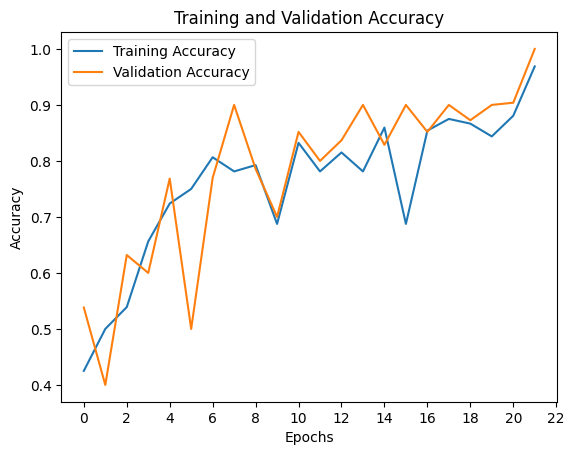

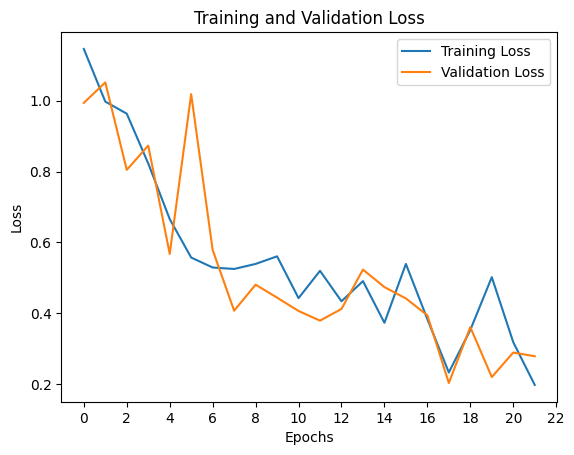

In [ ]:
# Menampilkan grafik akurasi
epochs = range(1, len(history.history['accuracy']) + 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.xticks(np.arange(0, len(epochs)+1, 2))
plt.legend()
plt.show()

# Menampilkan grafik loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xticks(np.arange(0, len(epochs)+1, 2))
plt.legend()
plt.show()


## **Memprediksi gambar yang diunggah**

Saving rock_megumin.jpg to rock_megumin (4).jpg
Saving Rock-paper-scissors_(scissors).png to Rock-paper-scissors_(scissors) (5).png
Saving paper.jpeg to paper (5).jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


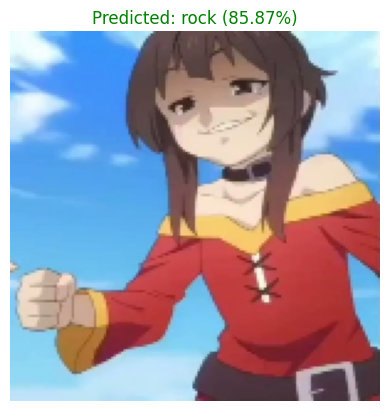

Predicted Class: rock, Probability: 85.87%

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


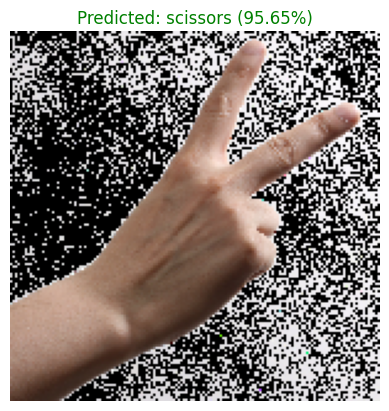

Predicted Class: scissors, Probability: 95.65%

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


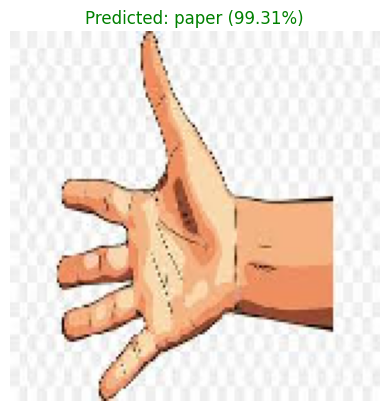

Predicted Class: paper, Probability: 99.31%



In [ ]:
from google.colab import files
from tensorflow.keras.preprocessing import image

# Fungsi untuk prediksi gambar
def predict_images(model, uploaded_files):
    class_names = ['paper', 'rock', 'scissors']  # Daftar nama kelas
    for img_path in uploaded_files:
        img = image.load_img(img_path, target_size=(150, 150))
        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)
        img_array /= 255.  # Normalisasi gambar

        prediction = model.predict(img_array)
        predicted_class = class_names[np.argmax(prediction)]
        predicted_prob = np.max(prediction) * 100  # Probabilitas prediksi

        # Warna untuk hasil berdasarkan probabilitas
        if predicted_prob > 70:
            color = 'green'
        elif predicted_prob >= 50:
            color = 'yellow'
        else:
            color = 'red'

        # Menampilkan gambar
        plt.imshow(img)
        plt.title(f"Predicted: {predicted_class} ({predicted_prob:.2f}%)", color=color)
        plt.axis('off')
        plt.show()

        print(f"Predicted Class: {predicted_class}, Probability: {predicted_prob:.2f}%\n")

# Mengunggah gambar (lebih dari satu file)
uploaded_files = files.upload()  # File upload di Colab

# Menyimpan gambar yang diunggah sementara di disk
uploaded_paths = []
for name in uploaded_files.keys():
    with open(name, 'wb') as f:
        f.write(uploaded_files[name])
    uploaded_paths.append(name)

# Panggil fungsi prediksi
predict_images(model, uploaded_paths)


Saving 32PDtFdAkUiAJbmP.png to 32PDtFdAkUiAJbmP.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


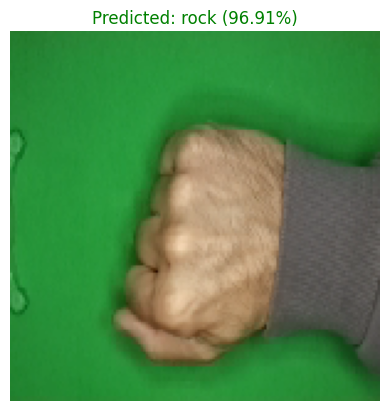

Predicted Class: rock, Probability: 96.91%



In [ ]:
from google.colab import files
from tensorflow.keras.preprocessing import image

# Fungsi untuk prediksi gambar
def predict_images(model, uploaded_files):
    class_names = ['paper', 'rock', 'scissors']  # Daftar nama kelas
    for img_path in uploaded_files:
        img = image.load_img(img_path, target_size=(150, 150))
        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)
        img_array /= 255.  # Normalisasi gambar

        prediction = model.predict(img_array)
        predicted_class = class_names[np.argmax(prediction)]
        predicted_prob = np.max(prediction) * 100  # Probabilitas prediksi

        # Warna untuk hasil berdasarkan probabilitas
        if predicted_prob > 70:
            color = 'green'
        elif predicted_prob >= 50:
            color = 'yellow'
        else:
            color = 'red'

        # Menampilkan gambar
        plt.imshow(img)
        plt.title(f"Predicted: {predicted_class} ({predicted_prob:.2f}%)", color=color)
        plt.axis('off')
        plt.show()

        print(f"Predicted Class: {predicted_class}, Probability: {predicted_prob:.2f}%\n")

# Mengunggah gambar (lebih dari satu file)
uploaded_files = files.upload()  # File upload di Colab

# Menyimpan gambar yang diunggah sementara di disk
uploaded_paths = []
for name in uploaded_files.keys():
    with open(name, 'wb') as f:
        f.write(uploaded_files[name])
    uploaded_paths.append(name)

# Panggil fungsi prediksi
predict_images(model, uploaded_paths)
